In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#libraries to use
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge

from sklearn.linear_model import LassoCV

from sklearn.linear_model import RidgeCV

import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [ ]:
#the goal here to determine which model will give us the most accurate results
#we will choose between Lasso and Ridge because we want to see which model
#works better given the uses for each and the model we have curently in place

path = '/content/drive/Shareddrives/MATH456/'

data = pd.read_csv(path + 'NormalizeClean.csv')

data = data.drop(['quarter'], axis=1)

alphas = 10**np.linspace(10,-2,100)*0.5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:9],
                                                      data.iloc[:,9],
                                                      test_size=.3)

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
opt_alpha_ridge = ridgecv.alpha_
print(f"Optimal Alpha for Ridge Model: {opt_alpha_ridge}")

lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, tol = .01)
lassocv.fit(X_train, y_train)
opt_alpha_lasso = lassocv.alpha_
print(f"Optimal Alpha for Lasso Model: {opt_alpha_lasso}")

#Create the two models
lasso_reg = Lasso(tol=.01)
lasso_reg.set_params(alpha=opt_alpha_lasso)
lasso_reg.fit(X_train, y_train)

clf  = Ridge()
clf.set_params(alpha=opt_alpha_ridge)
clf.fit(X_train, y_train)

#Make lists of each models' NASDAQ predictions
# so that we can find the error in the models.
lasso_predictions = lasso_reg.predict(X_test)
clf_predictions = clf.predict(X_test)
true_values = y_test.tolist()

for i in range(len(true_values)):
  print("-----------------------------------")
  print(f"      True value: {true_values[i]}")
  print(f"Lasso Prediction: {lasso_predictions[i]}")
  print(f"Ridge Prediction: {clf_predictions[i]}")
  print("Error: ")
  print(f"Lasso Error: {np.abs(true_values[i]-lasso_predictions[i])}")
  print(f"Ridge Error: {np.abs(true_values[i]-clf_predictions[i])}")
  print()

lasso_coeffs = list(zip(lasso_reg.coef_, X_train))

clf_coeffs = list(zip(clf.coef_, X_train))

print('Coeffecients of Lasso Model')
print('-------------------------------------------------------')
for coeff in lasso_coeffs:
  print(coeff[1])
  print(coeff[0])
  print()
  print('-------------------------------------------------------')

print("Coeffecients of Ridge Model")
print('-------------------------------------------------------')
for coeff in clf_coeffs:
  print(coeff[1])
  print(coeff[0])
  print()
  print('-------------------------------------------------------')

Optimal Alpha for Ridge Model: 0.24885117821660568
Optimal Alpha for Lasso Model: 4.055654153948428
-----------------------------------
      True value: 4600.94
Lasso Prediction: 4744.931344561201
Ridge Prediction: 4859.953837599192
Error: 
Lasso Error: 143.991344561201
Ridge Error: 259.0138375991928

-----------------------------------
      True value: 6095.44
Lasso Prediction: 6100.472418472916
Ridge Prediction: 5740.935958987848
Error: 
Lasso Error: 5.032418472916106
Ridge Error: 354.5040410121519

-----------------------------------
      True value: 4845.71
Lasso Prediction: 5153.585276921005
Ridge Prediction: 5246.580544855204
Error: 
Lasso Error: 307.875276921005
Ridge Error: 400.87054485520366

-----------------------------------
      True value: 4998.14
Lasso Prediction: 5378.796595361568
Ridge Prediction: 5419.18715524761
Error: 
Lasso Error: 380.65659536156727
Ridge Error: 421.0471552476092

-----------------------------------
      True value: 4195.81
Lasso Prediction: 4

In [ ]:
#Assessment of the Lasso and Ridge models over N possible train/test data
#splits. The .score() function returns the R^2 coeffecient, which helps to
#measure the accuracy of the respective model. The best possible score is 1.0,
#and ideally we would produce a model with a score of .7 or better.

lasso_scores = []
lasso_error = []
lasso_rawerror = []
lasso_RMSE = []
lasso_ave_pos_error = []
lasso_ave_neg_error = []

ridge_scores = []
ridge_error = []
ridge_rawerror = []
ridge_RMSE = []
ridge_ave_pos_error = []
ridge_ave_neg_error = []

for i in range(10000):
  X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:9],
                                                      data.iloc[:,9],
                                                      test_size=.3, random_state = i)


  ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
  ridgecv.fit(X_train, y_train)
  opt_alpha_ridge = ridgecv.alpha_

  lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, tol = .01)
  lassocv.fit(X_train, y_train)
  opt_alpha_lasso = lassocv.alpha_

  #Create the two models
  lasso_reg = Lasso(tol=.01)
  lasso_reg.set_params(alpha=opt_alpha_lasso)
  lasso_reg.fit(X_train, y_train)

  clf  = Ridge()
  clf.set_params(alpha=opt_alpha_ridge)
  clf.fit(X_train, y_train)

  #Find the R^2 score of the two models
  lasso_scores.append(lasso_reg.score(X_test, y_test))
  ridge_scores.append(clf.score(X_test, y_test))

  #Make lists of each models' NASDAQ predictions
  # so that we can find the error in the models.
  lasso_predictions = lasso_reg.predict(X_test)
  clf_predictions = clf.predict(X_test)
  true_values = y_test.tolist()

  temp_lasso = []
  temp_lasso_pos = []
  temp_lasso_neg = []

  temp_ridge = []
  temp_ridge_pos = []
  temp_ridge_neg = []

  #Loops through the true values and calculates
  # various errors.
  for j in range(len(true_values)):
    lasso_e = lasso_predictions[j]-true_values[j]
    ridge_e = clf_predictions[j]-true_values[j]
    lasso_error.append(lasso_e)
    temp_lasso.append(lasso_e)
    ridge_error.append(ridge_e)
    temp_ridge.append(ridge_e)
    if lasso_e >= 0:
      temp_lasso_pos.append(lasso_e)
    else:
      temp_lasso_neg.append(lasso_e)
    if ridge_e >= 0:
      temp_ridge_pos.append(ridge_e)
    else:
      temp_ridge_neg.append(ridge_e)


  lasso_RMSE.append(np.sqrt((sum(temp_lasso)**2)/len(temp_lasso)))
  lasso_rawerror.append(sum(temp_lasso)/len(temp_lasso))

  ridge_RMSE.append(np.sqrt((sum(temp_ridge)**2)/len(temp_ridge)))
  ridge_rawerror.append(sum(temp_ridge)/len(temp_ridge))

  try:
    lasso_ave_pos_error.append(sum(temp_lasso_pos)/len(temp_lasso_pos))
    lasso_ave_neg_error.append(sum(temp_lasso_neg)/len(temp_lasso_neg))
    ridge_ave_pos_error.append(sum(temp_ridge_pos)/len(temp_ridge_pos))
    ridge_ave_neg_error.append(sum(temp_ridge_neg)/len(temp_ridge_neg))
  except ZeroDivisionError:
    pass
  if i % 100 == 0:
    print(i)


mean_lasso_score = sum(lasso_scores)/len(lasso_scores)
mean_ridge_score = sum(ridge_scores)/len(ridge_scores)

mean_lasso_RMSE = sum(lasso_RMSE)/len(lasso_RMSE)
mean_ridge_RMSE = sum(ridge_RMSE)/len(lasso_RMSE)


print('Average Lasso Score: ', mean_lasso_score)
print('Average Lasso RMSE: ', mean_lasso_RMSE)
print()
print('Average Ridge Score: ', mean_ridge_score)
print('Average Ridge RMSE: ', mean_ridge_RMSE)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
Average Lasso Score:  0.9415165993985325
Average Lasso RMSE:  753.0143799101252

Average Ridge Score:  0.9181121903610201
Average Ridge RMSE:  901.5096971377302


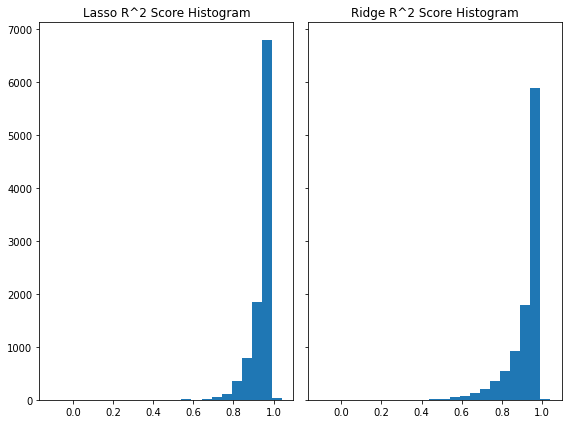

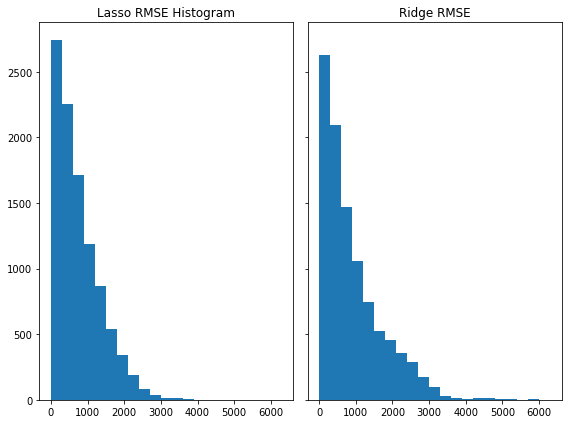

In [ ]:
binwidth = .05
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,6), sharey = True, sharex = True)
ax1.hist(lasso_scores, bins=np.arange(min(lasso_scores), max(lasso_scores) + binwidth, binwidth))
ax1.set_title('Lasso R^2 Score Histogram')
ax2.hist(ridge_scores, bins=np.arange(min(ridge_scores), max(ridge_scores) + binwidth, binwidth))
ax2.set_title('Ridge R^2 Score Histogram')
plt.tight_layout()

binwidth = 300
f, (ax3, ax4) = plt.subplots(1, 2, figsize=(8,6), sharey = True, sharex = True)
ax3.hist(lasso_RMSE, bins=np.arange(min(lasso_RMSE), max(lasso_RMSE) + binwidth, binwidth))
ax3.set_title('Lasso RMSE Histogram')
ax4.hist(ridge_RMSE, bins=np.arange(min(ridge_RMSE), max(ridge_RMSE) + binwidth, binwidth))
ax4.set_title('Ridge RMSE')
plt.tight_layout()

Lasso Average Error Standard Deviation:  275.63355389500714
              Lasso Average Error Mean:  59.47302371724284

Ridge Average Error Standard Deviation:  344.4107371718588
              Ridge Average Error Mean:  67.56153614931694


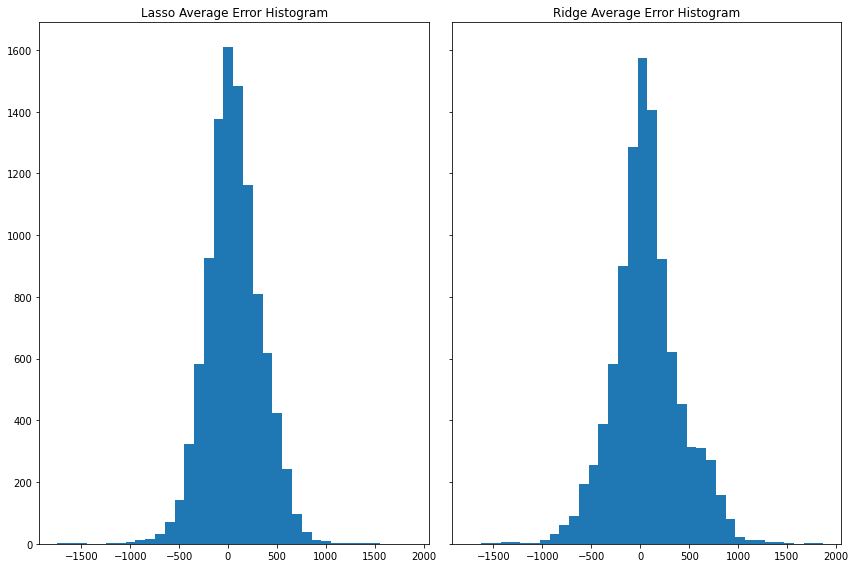

In [ ]:
binwidth = 100
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8), sharex = True, sharey = True)
ax1.hist(lasso_rawerror, bins=np.arange(min(lasso_rawerror), max(lasso_rawerror) + binwidth, binwidth))
ax1.set_title('Lasso Average Error Histogram')
ax2.hist(ridge_rawerror, bins=np.arange(min(ridge_rawerror), max(ridge_rawerror) + binwidth, binwidth))
ax2.set_title('Ridge Average Error Histogram')
plt.tight_layout()

print('Lasso Average Error Standard Deviation: ', np.std(lasso_rawerror))
print('              Lasso Average Error Mean: ', np.mean(lasso_rawerror))
print()
print('Ridge Average Error Standard Deviation: ', np.std(ridge_rawerror))
print('              Ridge Average Error Mean: ', np.mean(ridge_rawerror))

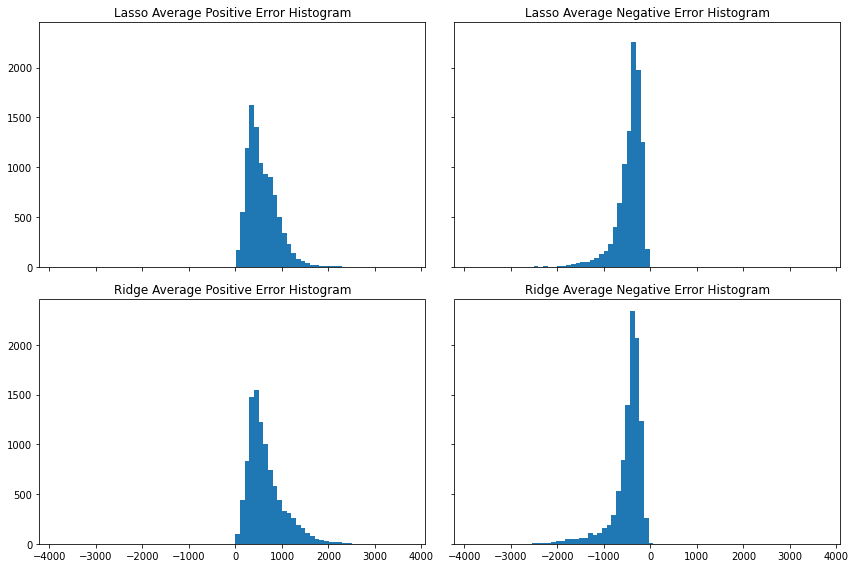

In [ ]:
binwidth = 100
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,8), sharey = True, sharex=True)
ax1.hist(lasso_ave_pos_error, bins=np.arange(min(lasso_ave_pos_error), max(lasso_ave_pos_error) + binwidth, binwidth))
ax1.set_title('Lasso Average Positive Error Histogram')
ax2.hist(lasso_ave_neg_error, bins=np.arange(min(lasso_ave_neg_error), max(lasso_ave_neg_error) + binwidth, binwidth))
ax2.set_title('Lasso Average Negative Error Histogram')
ax3.hist(ridge_ave_pos_error, bins=np.arange(min(ridge_ave_pos_error), max(ridge_ave_pos_error) + binwidth, binwidth))
ax3.set_title('Ridge Average Positive Error Histogram')
ax4.hist(ridge_ave_neg_error, bins=np.arange(min(ridge_ave_neg_error), max(ridge_ave_neg_error) + binwidth, binwidth))
ax4.set_title('Ridge Average Negative Error Histogram')
plt.tight_layout()

Roughly 24.324324324324326 percent of the quarters had a change of over 200 points


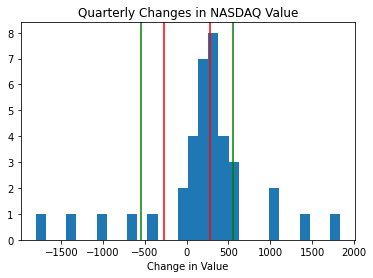

In [ ]:
my_y = data.iloc[:,9].tolist()
quarterly_change = []

for i in range(len(my_y)-1):
  quarterly_change.append(my_y[i+1] - my_y[i])

greater_than_200 = 0

for i in quarterly_change:
  if np.abs(i) >= 550:
    greater_than_200 += 1

print('Roughly', greater_than_200/len(quarterly_change) * 100, 'percent of the quarters had a change of over 200 points')

plt.figure(0)
plt.hist(quarterly_change, bins = 30)
plt.title("Quarterly Changes in NASDAQ Value")
plt.xlabel("Change in Value")
plt.axvline(x = 275, color = 'r', label = 'axvline - full height')
plt.axvline(x = -275, color = 'r', label = 'axvline - full height')
plt.axvline(x = 550, color = 'g', label = 'axvline - full height')
plt.axvline(x = -550, color = 'g', label = 'axvline - full height')
plt.show()


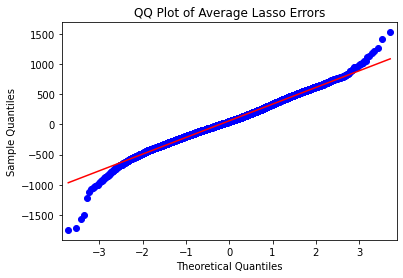

In [ ]:
#The QQ plot shows that the errors in the ridge regression are very nearly normally distributed
qqplot(np.array(lasso_rawerror), line='s')
plt.title('QQ Plot of Average Lasso Errors')
plt.show()